##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classifier

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data
Choose one of the training data sets below:


In [ ]:
#OR gate

#number of training vectors
num_vectors = 4
num_features = 2

#inputs (features)
input    = np.array([[0.1,0.1],[0.1,0.9],[0.9,0.1],[0.9,0.9]],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0,1],[0,1],[0,1],[1,0]],  dtype=float)

input: [0.1 0.1], output: [0. 1.]
input: [0.1 0.9], output: [0. 1.]
input: [0.9 0.1], output: [0. 1.]
input: [0.9 0.9], output: [1. 0.]


In [ ]:
#Exclusive-OR gate

#number of training vectors
num_vectors = 4
num_features = 2

#inputs
input    = np.array([[0.1,0.1],[0.1,0.9],[0.9,0.1],[0.9,0.9]],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0,1],[1,0],[1,0],[0,1]],  dtype=float)

input: [0.1 0.1], output: [0. 1.]
input: [0.1 0.9], output: [1. 0.]
input: [0.9 0.1], output: [1. 0.]
input: [0.9 0.9], output: [0. 1.]


In [4]:
#two-spiral

#number of training vectors
num_vectors = 24
num_features = 2

#inputs
input    = np.array([[-1.90023,0.37819],[-1.50693,1.00714],[-0.93737,1.40321],[-0.30465,1.53251],[0.28061,1.40985],[0.72932,1.09122],[0.98745,0.65962],[1.04211,0.20715],[0.91946,-0.18302],[0.67551,-0.45149],[0.38188,-0.57169],[0.10966,-0.55171],[1.90023,-0.37819],[1.50693,-1.00714],[0.93737,-1.40321],[0.30465,-1.53251],[-0.28061,-1.40985],[-0.72932,-1.09122],[-0.98745,-0.65962],[-1.04211,-0.20715],[-0.91946,0.18302],[-0.67551,0.45149],[-0.38188,0.57169],[-0.10966,0.55171]
],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0]],  dtype=float)

##Print training data

In [5]:
#print training vectors
for i,c in enumerate(input):
  print("input: {}, output: {}".format(c, output[i]))

input: [-1.90023  0.37819], output: [0. 1.]
input: [-1.50693  1.00714], output: [0. 1.]
input: [-0.93737  1.40321], output: [0. 1.]
input: [-0.30465  1.53251], output: [0. 1.]
input: [0.28061 1.40985], output: [0. 1.]
input: [0.72932 1.09122], output: [0. 1.]
input: [0.98745 0.65962], output: [0. 1.]
input: [1.04211 0.20715], output: [0. 1.]
input: [ 0.91946 -0.18302], output: [0. 1.]
input: [ 0.67551 -0.45149], output: [0. 1.]
input: [ 0.38188 -0.57169], output: [0. 1.]
input: [ 0.10966 -0.55171], output: [0. 1.]
input: [ 1.90023 -0.37819], output: [1. 0.]
input: [ 1.50693 -1.00714], output: [1. 0.]
input: [ 0.93737 -1.40321], output: [1. 0.]
input: [ 0.30465 -1.53251], output: [1. 0.]
input: [-0.28061 -1.40985], output: [1. 0.]
input: [-0.72932 -1.09122], output: [1. 0.]
input: [-0.98745 -0.65962], output: [1. 0.]
input: [-1.04211 -0.20715], output: [1. 0.]
input: [-0.91946  0.18302], output: [1. 0.]
input: [-0.67551  0.45149], output: [1. 0.]
input: [-0.38188  0.57169], output: [1. 

##Plot training data (for one-hot encoding)

<function matplotlib.pyplot.show>

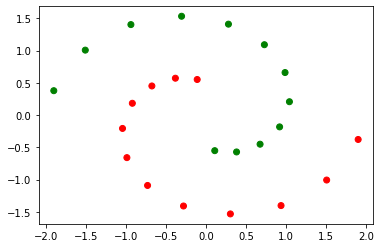

In [6]:
#plot data (for up to three categories)
import matplotlib.pyplot as plt

c=[None for i in range(num_vectors)]
for i in range(num_vectors):
  ix=np.argmax(output[i,:])
  c[i]=('r','g','b')[ix]

plt.scatter(input[:,0],input[:,1],color=c)
plt.show


Normalize input data

In [7]:
# Normalize input data between -1 and 1
# make mean = 0
input = input - np.mean(input, axis=0)
# normalize by dividing by maximum value
input = input / np.max(input, axis=0)



##Plot training data (for one-hot encoding)

<function matplotlib.pyplot.show>

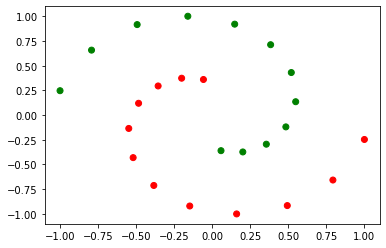

In [9]:
#plot data (for up to three categories)
import matplotlib.pyplot as plt

c=[None for i in range(num_vectors)]
for i in range(num_vectors):
  ix=np.argmax(output[i,:])
  c[i]=('r','g','b')[ix]

plt.scatter(input[:,0],input[:,1],color=c)
plt.show

# Single-layer neural network

##Create the model

### Build a layer


In [10]:
l0 = tf.keras.layers.Dense(units=2, input_shape=(2,), activation = 'softmax')

### Assemble layers into the model

In [11]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions



In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.1),metrics=['accuracy'])

## Train the model


In [13]:
history = model.fit(input, output, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 [==============================] - 0s 499ms/step - loss: 0.8214 - accuracy: 0.4167
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7785 - accuracy: 0.4167
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7412 - accuracy: 0.4583
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7043 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6464 - accuracy: 0.5417
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.5833
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.5833
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.5833
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5672 - accuracy: 0.6250
Epoch 11/500
1/1 [=========

## Display training statistics


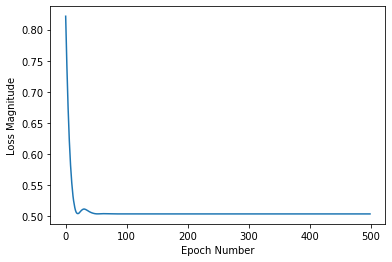

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values


In [15]:
#show predictions for inputs
print(model.predict(input))

[[0.5954142  0.4045858 ]
 [0.28059283 0.71940714]
 [0.12387348 0.87612647]
 [0.07342239 0.92657757]
 [0.06639871 0.93360126]
 [0.0886725  0.9113275 ]
 [0.15296811 0.8470319 ]
 [0.2802123  0.7197878 ]
 [0.45340624 0.5465938 ]
 [0.60398364 0.3960164 ]
 [0.6893362  0.3106638 ]
 [0.7135556  0.28644443]
 [0.4045858  0.5954143 ]
 [0.71940714 0.28059286]
 [0.87612647 0.12387348]
 [0.92657757 0.07342239]
 [0.93360126 0.06639871]
 [0.9113275  0.0886725 ]
 [0.8470319  0.15296812]
 [0.7197877  0.2802123 ]
 [0.5465937  0.45340624]
 [0.3960164  0.60398364]
 [0.31066376 0.6893362 ]
 [0.2864444  0.7135556 ]]


<function matplotlib.pyplot.show>

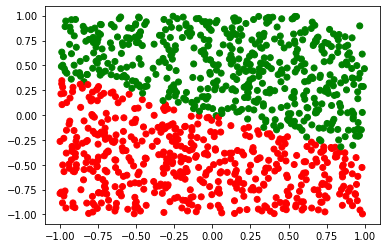

In [16]:
#Plot categories using colors

#generate random test input vectors
test_m = 1000

test_x = (np.random.random((test_m,num_features)).astype(np.float32)-0.5)*2

#get preditions for random test input vectors
prediction=model.predict(test_x,batch_size=test_m)

#initial c vector for colors
c=[None for i in range(test_m)]

#assign colors according to greatest output (for up to three categories)
for i in range(test_m):
  ix=np.argmax(prediction[i,:])
  c[i]=('r','g','b')[ix]
#  if np.any(prediction[ix]) < 0.8:
#   c[i]='y'

#plot categories using colors

import matplotlib.pyplot as plt
plt.scatter(test_x[:,0],test_x[:,1],color=c)
plt.show

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[ 2.7784128, -4.131972 ],
       [ 3.0174391, -4.214273 ]], dtype=float32), array([-3.5179372,  3.5179331], dtype=float32)]


# Neural network with middle layers

In [17]:
l0 = tf.keras.layers.Dense(units=10, input_shape=(2,), activation = 'relu')
l1 = tf.keras.layers.Dense(units=10, activation = 'relu')
l2 = tf.keras.layers.Dense(units=2, activation = 'softmax')
model = tf.keras.Sequential([l0, l1, l2])
#model = tf.keras.Sequential([l0, l2])
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.1))

In [24]:
model.fit(input, output, epochs=500, verbose=True)
print("Finished training the model")


Epoch 1/500
1/1 [==============================] - 0s 7ms/step - loss: 3.0796e-07
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0796e-07
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0796e-07
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0796e-07
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 3.0796e-07
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 3.0796e-07
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 3.0796e-07
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0796e-07
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 3.0796e-07
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 3.0796e-07
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 3.0796e-07
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0299e-07
Epoch 13/5

In [22]:
#show predictions for inputs
print(model.predict(input))

[[6.88041624e-10 1.00000000e+00]
 [7.02506570e-25 1.00000000e+00]
 [3.80860019e-29 1.00000000e+00]
 [7.05770137e-25 1.00000000e+00]
 [2.37626623e-14 1.00000000e+00]
 [1.41867462e-09 1.00000000e+00]
 [2.32700632e-13 1.00000000e+00]
 [2.21567285e-13 1.00000000e+00]
 [4.37745040e-09 1.00000000e+00]
 [1.06342475e-06 9.99998927e-01]
 [1.58990576e-06 9.99998450e-01]
 [1.51655911e-06 9.99998450e-01]
 [9.99998331e-01 1.71373358e-06]
 [1.00000000e+00 3.34840832e-14]
 [1.00000000e+00 5.59344687e-15]
 [1.00000000e+00 3.68817615e-11]
 [1.00000000e+00 3.09703929e-09]
 [1.00000000e+00 3.38329755e-08]
 [1.00000000e+00 1.08893736e-13]
 [1.00000000e+00 1.12584428e-13]
 [1.00000000e+00 5.96223973e-11]
 [9.99999881e-01 1.40442836e-07]
 [1.00000000e+00 5.92416107e-08]
 [9.99998569e-01 1.48688036e-06]]


<function matplotlib.pyplot.show>

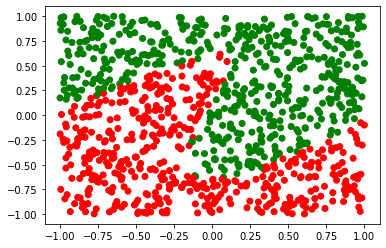

In [25]:
#Plot categories using colors

#generate random test input vectors
test_m = 1000

test_x = (np.random.random((test_m,num_features)).astype(np.float32)-0.5)*2.0

#get preditions for random test input vectors
prediction=model.predict(test_x,batch_size=test_m)

#initial c vector for colors
c=[None for i in range(test_m)]

#assign colors according to greatest output (for up to three categories)
for i in range(test_m):
  ix=np.argmax(prediction[i,:])
  c[i]=('r','g','b')[ix]
#  if np.any(prediction[ix]) < 0.8:
#    c[i]='y'

#plot categories using colors

import matplotlib.pyplot as plt
plt.scatter(test_x[:,0],test_x[:,1],color=c)
plt.show
